Welcome to the project of customer data


Let us import required packages

In [2]:
import pandas as pd
import numpy as np
import csv
import datetime
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

Now read data from github repository and order customer id in descending order

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/jaanu/Screening_test/master/screening_exercise_orders_v201810.csv')
df.sort_values(["customer_id"], axis=0,ascending= False,inplace= True)
df.head(10)

,customer_id,gender,date,value,predicted_gender
13469,9813,0,2017-12-31 23:11:02,534.00,1
13468,9812,0,2017-12-31 23:01:10,153.00,1
13467,9811,1,2017-12-31 22:24:06,148.60,0
13466,9810,1,2017-12-31 22:16:20,794.44,0
13465,9809,1,2017-12-31 21:39:33,606.40,1
13464,9808,1,2017-12-31 21:39:27,222.76,0
13463,9807,0,2017-12-31 21:24:08,237.35,0
13462,9806,1,2017-12-31 21:08:36,375.40,1
13459,9805,1,2017-12-31 20:07:35,194.71,1
13458,9804,0,2017-12-31 19:49:44,162.60,0


In [10]:
df["date"]= pd.to_datetime(df["date"])

,customer_id,gender,date,value,predicted_gender
13469,9813,0,2017-12-31 23:11:02,534.00,1
13468,9812,0,2017-12-31 23:01:10,153.00,1
13467,9811,1,2017-12-31 22:24:06,148.60,0
13466,9810,1,2017-12-31 22:16:20,794.44,0
13465,9809,1,2017-12-31 21:39:33,606.40,1
13464,9808,1,2017-12-31 21:39:27,222.76,0
13463,9807,0,2017-12-31 21:24:08,237.35,0
13462,9806,1,2017-12-31 21:08:36,375.40,1
13459,9805,1,2017-12-31 20:07:35,194.71,1
13458,9804,0,2017-12-31 19:49:44,162.60,0


In [51]:
# group by name and convert dates into individual columns
grouped_df = df.sort_values("date", ascending=False).groupby("customer_id")['date'].apply(list).apply(pd.Series).reset_index()
# truncate and rename columns
grouped_df = grouped_df[["customer_id", 0]]
grouped_df.columns = ["customer_id", "most_recent"]
grouped_df

,customer_id,most_recent
0,1000,2017-01-01 00:11:31
1,1001,2017-01-01 00:29:56
2,1002,2017-02-19 21:35:31
3,1003,2017-04-26 02:37:20
4,1004,2017-01-01 03:11:54
5,1005,2017-12-16 01:39:27
6,1006,2017-05-09 15:27:20
7,1007,2017-01-01 15:59:50
8,1008,2017-12-17 05:47:48
9,1009,2017-01-01 19:27:17


In [77]:
df2=df.groupby('customer_id', as_index=False).max()
df1=df.groupby('customer_id', as_index=False)['value'].count()
df1
df3=df2[['customer_id', 'gender', 'date']]

df3

,customer_id,gender,date
0,1000,0,2017-01-01 00:11:31
1,1001,0,2017-01-01 00:29:56
2,1002,1,2017-02-19 21:35:31
3,1003,1,2017-04-26 02:37:20
4,1004,0,2017-01-01 03:11:54
5,1005,1,2017-12-16 01:39:27
6,1006,1,2017-05-09 15:27:20
7,1007,0,2017-01-01 15:59:50
8,1008,0,2017-12-17 05:47:48
9,1009,1,2017-01-01 19:27:17


In [81]:
result = pd.merge(df1, df3, on='customer_id')
resultnew= result[['customer_id', 'gender', 'date', 'value']]
resultnew

,customer_id,gender,date,value
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


In [4]:
df["week_number"]=df["date"].dt.week

df.columns

Index(['customer_id', 'gender', 'date', 'value', 'predicted_gender',
       'week_number'],
      dtype='object')

Text(0,0.5,'count')

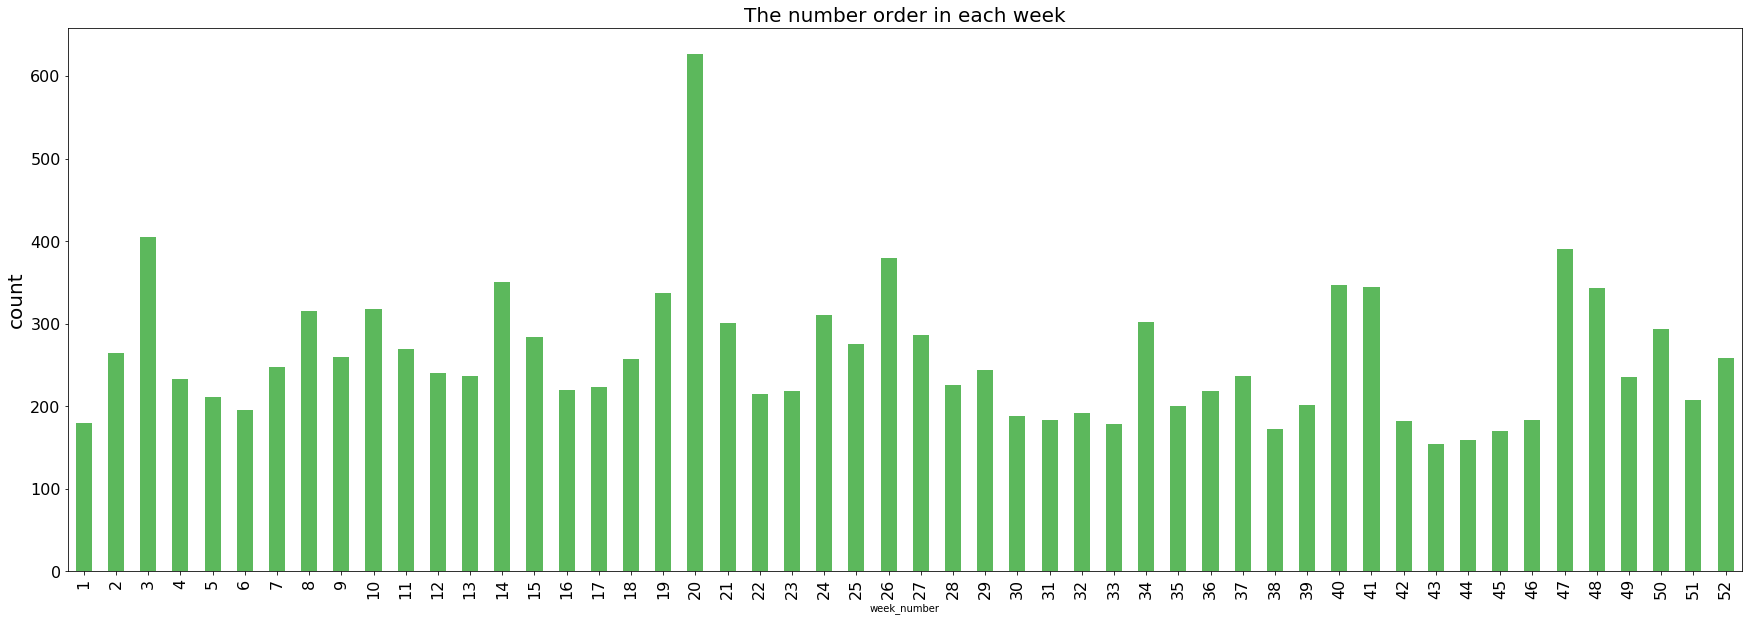

In [5]:

plt=df.groupby(['week_number'])['value'].count().plot(kind='bar', figsize=(30,10),rot=90,width=0.5,fontsize= 16,color=('#5cb85c'))
plt.set_alpha(0.8)
plt.set_title('The number order in each week',fontsize=20)
plt.set_ylabel('count',fontsize= 20)


In [6]:
df.groupby(['gender'])['value'].mean()

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [7]:
y_actu = pd.Series(df['gender'], name='Actual')
y_pred = pd.Series(df['predicted_gender'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1
Actual,,
0,3349,3410
1,1463,5249


In [17]:

from sklearn import preprocessing
x=df[['customer_id', 'gender', 'value']]

x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df['predicted_gender'].values
x.shape


(13471, 3)

In [16]:
y.shape

(13471,)

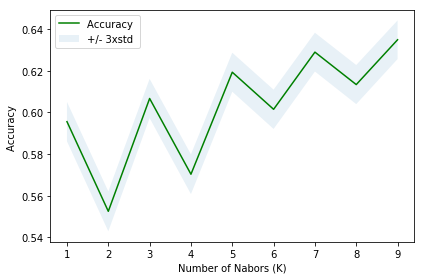

The best accuracy was with 0.634879406308 with k= 9


In [20]:
#KNN
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks=10
mean_acc= np.zeros(ks-1)
std_acc= np.zeros(ks-1)
ConfusionMx= []
for n in range(1,ks):
    #train the model and predict
    neigh= KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_hat= neigh.predict(x_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1]= np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

#Plot model accuracy for different number of k
plt1.plot(range(1,ks),mean_acc,'g')
plt1.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt1.legend(('Accuracy ', '+/- 3xstd'))
plt1.ylabel('Accuracy ')
plt1.xlabel('Number of Nabors (K)')
plt1.tight_layout()
plt1.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [26]:
# so the best accuracy at k=9
#let training the with k=9 and evaluate the result
#the best value of k is 9
neigh= KNeighborsClassifier(n_neighbors = 9).fit(x_train,y_train)
y_hat= neigh.predict(x_test)

In [22]:
#Decision tree
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.22, random_state=10)
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(x_trainset,y_trainset)
y_hatdt = drugTree.predict(x_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_hatdt))
from sklearn.metrics import jaccard_similarity_score
#print("jaccard_similarity_score: ",jaccard_similarity_score(y_testset, y_hatdt))
from sklearn.metrics import f1_score
#print(f1_score(y_testset, y_hatdt, average='weighted'))

DecisionTrees's Accuracy:  0.634615384615


In [23]:
#Logistic regression

x_trainlog,x_testlog,y_trainlog,y_testlog= train_test_split(x,y,test_size=0.2, random_state=10)
print ('Train set:', x_trainlog.shape,  y_trainlog.shape)
print ('Test set:', x_testlog.shape,  y_testlog.shape)
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_trainlog,y_trainlog)
yhatlog=LR.predict(x_testlog)
yhat_prob = LR.predict_proba(x_testlog)

print("Logistic regression Jaccard similarity score: ",jaccard_similarity_score(y_testlog, yhatlog))
from sklearn.metrics import log_loss
print("Logistic regression log_loss: ",log_loss(y_testlog, yhat_prob))
print("Logistic regression f1_score: ",f1_score(y_testlog, yhatlog, average='weighted'))

Train set: (10776, 3) (10776,)
Test set: (2695, 3) (2695,)
Logistic regression Jaccard similarity score:  0.630426716141
Logistic regression log_loss:  0.619738740022
Logistic regression f1_score:  0.611917427319


In [24]:
#SVM
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split( x, y, test_size=0.2, random_state=13)
from sklearn import svm
#choice of kernel functions for performing its processing
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainsvm, y_trainsvm) 
yhatsvm = clf.predict(X_testsvm)
#print("f1_score: ",f1_score(y_testsvm, yhatsvm, average='weighted'))
#print("jaccard_similarity_score: ",jaccard_similarity_score(y_testsvm, yhatsvm))

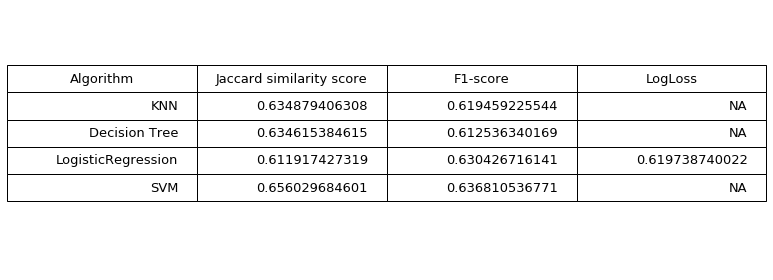

In [27]:
#report: evaluate all model
JaccardkNN=jaccard_similarity_score(y_test, y_hat)
F1ScorekNN= f1_score(y_test, y_hat, average='weighted')
JaccardDT=jaccard_similarity_score(y_testset, y_hatdt)
F1ScoreDT=f1_score(y_testset, y_hatdt, average='weighted')
F1ScoreLR=f1_score(y_testlog, yhatlog, average='weighted')
JaccardLR=jaccard_similarity_score(y_testlog, yhatlog)
logLR=log_loss(y_testlog, yhat_prob)
JaccardSVM=jaccard_similarity_score(y_testsvm, yhatsvm)
F1ScoreSVM=f1_score(y_testsvm, yhatsvm, average='weighted')
#make data report
data_report =np.array([['KNN',JaccardkNN ,F1ScorekNN,'NA'],['Decision Tree',JaccardDT,F1ScoreDT,'NA'], ['LogisticRegression',F1ScoreLR,JaccardLR, logLR],['SVM',JaccardSVM,F1ScoreSVM,'NA']
     ])

fig, ax = plt.subplots()
ax.axis('off')
#ax.axis('tight')
df = pd.DataFrame(data_report, columns=['Algorithm','Jaccard similarity score','F1-score','LogLoss'])
#put data report into table
report=ax.table(cellText=df.values, colLabels=df.columns, loc='center')
report.set_fontsize(24)
report.scale(2,2)
fig.tight_layout()

KeyError: 'customer_id'